# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


#CREATE EMPTY LISTS FOR KEYS IN DF (JSON DATA WILL BE STORED IN HERE)

city_name = []
country = []
lat = []
long = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

#INITIATE COUNT FOR LOOP

count = 1

print('***   '*8)

#LOOP THROUGH THE LIST OF CITIES, PERFORM API REQ ON EACH, SAVE SELECTED DATA

for city in cities:
    
    try: 
        req_test = requests.get(base_url + f'&q={city}').json()
        city_name.append(req_test['name'])
        country.append(req_test['sys']['country'])
        lat.append(req_test['coord']['lat'])
        long.append(req_test['coord']['lon'])
        date.append(req_test['dt'])
        max_temp.append(req_test['main']['temp_max'])
        humidity.append(req_test['main']['humidity'])
        cloudiness.append(req_test['clouds']['all'])
        wind_speed.append(req_test['wind']['speed'])
        
        print(f'Processing record {count} : {city}')
        
        count +=1
        
    except:
        
        print(f'No data for city {city}. Moving on.')
        
        continue

print('***   '*8)
print(f'All Finished.')
print(f'Prepare for munging!')
print('***   '*8)


***   ***   ***   ***   ***   ***   ***   ***   
Processing record 1 : albany
Processing record 2 : chuy
Processing record 3 : mataura
No data for city saleaula. Moving on.
Processing record 4 : port macquarie
Processing record 5 : lodeynoye pole
Processing record 6 : beira
Processing record 7 : chiredzi
No data for city taolanaro. Moving on.
Processing record 8 : bengkulu
Processing record 9 : arraial do cabo
Processing record 10 : khatanga
Processing record 11 : lorengau
Processing record 12 : acari
Processing record 13 : arkansas city
Processing record 14 : ushuaia
Processing record 15 : aknada
No data for city illoqqortoormiut. Moving on.
Processing record 16 : bethel
Processing record 17 : atar
Processing record 18 : hermanus
Processing record 19 : torbay
No data for city belushya guba. Moving on.
Processing record 20 : atuona
Processing record 21 : hasaki
Processing record 22 : busselton
Processing record 23 : sept-iles
Processing record 24 : gao
Processing record 25 : kahului
No

Processing record 226 : mbamba
Processing record 227 : kloulklubed
Processing record 228 : mackay
Processing record 229 : yunyang
Processing record 230 : petropavlovsk-kamchatskiy
Processing record 231 : nabire
Processing record 232 : naze
Processing record 233 : mandalgovi
Processing record 234 : vangaindrano
Processing record 235 : natal
Processing record 236 : kavieng
Processing record 237 : kirakira
Processing record 238 : panalingaan
Processing record 239 : wattegama
Processing record 240 : troitsk
Processing record 241 : la macarena
Processing record 242 : tessalit
Processing record 243 : tura
Processing record 244 : emerald
Processing record 245 : ballina
Processing record 246 : miraflores
Processing record 247 : camacha
Processing record 248 : tuktoyaktuk
Processing record 249 : aklavik
Processing record 250 : khandagayty
Processing record 251 : tecoanapa
Processing record 252 : rorvik
Processing record 253 : oranjemund
Processing record 254 : marystown
Processing record 255 : 

Processing record 454 : shurob
Processing record 455 : innisfail
Processing record 456 : nokaneng
Processing record 457 : cartagena
Processing record 458 : mogadishu
Processing record 459 : liverpool
Processing record 460 : leh
Processing record 461 : bac lieu
Processing record 462 : aranos
Processing record 463 : nitra
Processing record 464 : oudtshoorn
Processing record 465 : vao
Processing record 466 : ola
Processing record 467 : ust-karsk
Processing record 468 : alice springs
Processing record 469 : katsuura
No data for city karauzyak. Moving on.
Processing record 470 : ljungby
Processing record 471 : awjilah
Processing record 472 : dumabato
Processing record 473 : prince rupert
Processing record 474 : hibbing
Processing record 475 : abong mbang
Processing record 476 : jining
Processing record 477 : wanning
Processing record 478 : rosiori
Processing record 479 : hofn
Processing record 480 : rocha
Processing record 481 : collie
Processing record 482 : ruangwa
Processing record 483 :

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [6]:
#CONSTRUCTING DICTIONARY FOR THE DATA FRAME
JSON_dict = {
    'City': city_name,
    'Country': country,
    'Latitude': lat,
    'Longitude': long,
    'Date': date,
    'MaxTemp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'WindSpeed': wind_speed
}

#CREATING A PANDAS DATAFRAME FROM JSON DATA
complete_weather = pd.DataFrame(JSON_dict)

#DISPLAY COUNT OF RECORDS
complete_weather.count()

City          584
Country       584
Latitude      584
Longitude     584
Date          584
MaxTemp       584
Humidity      584
Cloudiness    584
WindSpeed     584
dtype: int64

In [7]:
#DISPLAY DATA FRAME HEAD
complete_weather.head(5)

,City,Country,Latitude,Longitude,Date,MaxTemp,Humidity,Cloudiness,WindSpeed
0,Albany,US,42.6001,-73.9662,1637097455,42.75,76,89,1.01
1,Chui,UY,-33.6971,-53.4616,1637097717,61.63,92,100,17.92
2,Mataura,NZ,-46.1927,168.8643,1637097718,45.95,99,100,8.05
3,Port Macquarie,AU,-31.4333,152.9167,1637097477,66.88,66,93,4.70
4,Lodeynoye Pole,RU,60.7260,33.5531,1637097718,38.79,93,100,6.22


In [8]:
#SAVE DATA FRAME TO CSV
complete_weather.to_csv('complete_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

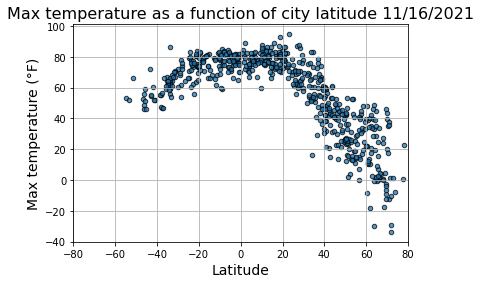

In [9]:
#TODAY'S DATE FOR TITLES
import datetime
today = datetime.date.today().strftime('%m/%d/%Y')

plt.scatter(complete_weather['Latitude'], complete_weather['MaxTemp'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Max temperature as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Max temperature (°F)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Max temperature as a function of city latitude.png')
plt.show()

#### Latitude vs. Humidity Plot

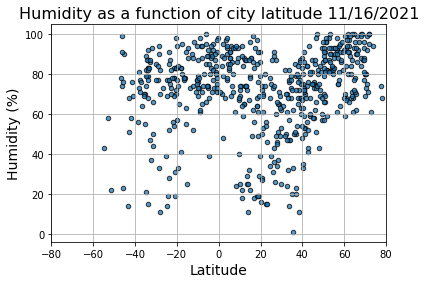

In [10]:
plt.scatter(complete_weather['Latitude'], complete_weather['Humidity'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Humidity as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Humidity (%)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Humidity as a function of city latitude.png')
plt.show()

#### Latitude vs. Cloudiness Plot

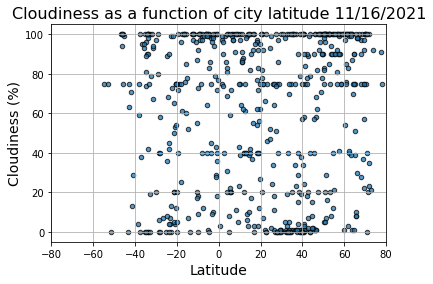

In [11]:
plt.scatter(complete_weather['Latitude'], complete_weather['Cloudiness'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Cloudiness as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Cloudiness as a function of city latitude.png')
plt.show()

#### Latitude vs. Wind Speed Plot

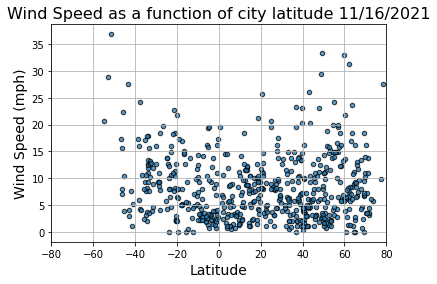

In [12]:
plt.scatter(complete_weather['Latitude'], complete_weather['WindSpeed'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Wind Speed as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Wind Speed as a function of city latitude.png')
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

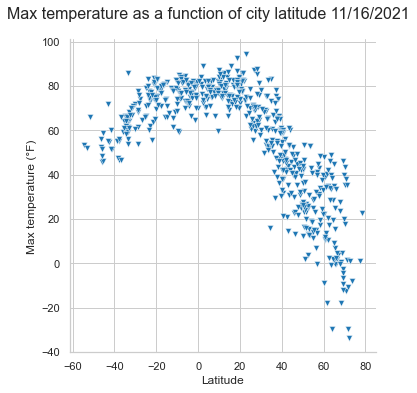

<Figure size 432x288 with 0 Axes>

In [14]:
#SETTING DEPENDENCIES AND PREFERENCES FOR SEABORN
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

#SCATTERPLOT FOR LATITUDE/TEMPERATURE

MAX_TEMP = sns.relplot(x = 'Latitude', y = 'MaxTemp', data = complete_weather, kind = 'scatter', marker = 'v')
MAX_TEMP.fig.suptitle(f'Max temperature as a function of city latitude {today}', fontsize = 16, y = 1.05)
MAX_TEMP.set(xlabel = 'Latitude', ylabel = 'Max temperature (°F)')
plt.show();
plt.savefig('MAX_TEMP.png')

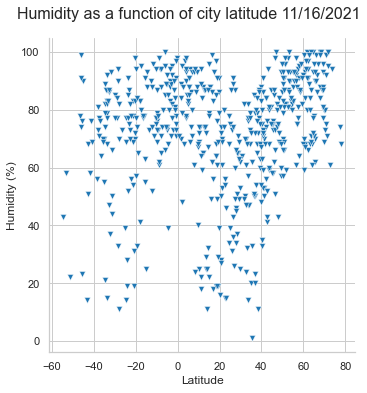

<Figure size 432x288 with 0 Axes>

In [16]:
#SEABORN SCATTERPLOT FOR LATITUDE/HUMIDITY

HUMIDITY = sns.relplot(x = 'Latitude', y = 'Humidity', data = complete_weather, kind = 'scatter', marker = 'v')
HUMIDITY.fig.suptitle(f'Humidity as a function of city latitude {today}', fontsize = 16, y = 1.05)
HUMIDITY.set(xlabel = 'Latitude', ylabel = 'Humidity (%)')
plt.show();
plt.savefig('HUMIDITY.png')

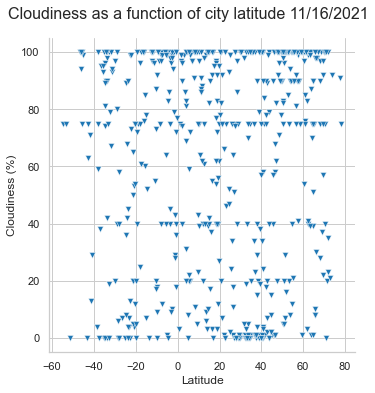

<Figure size 432x288 with 0 Axes>

In [17]:
#SEABORN SCATTERPLOT FOR LATITUDE/CLOUDINESS

CLOUDINESS = sns.relplot(x = 'Latitude', y = 'Cloudiness', data = complete_weather, kind = 'scatter', marker = 'v')
CLOUDINESS.fig.suptitle(f'Cloudiness as a function of city latitude {today}', fontsize = 16, y = 1.05)
CLOUDINESS.set(xlabel = 'Latitude', ylabel = 'Cloudiness (%)')
plt.show();
plt.savefig('CLOUDINESS.png')

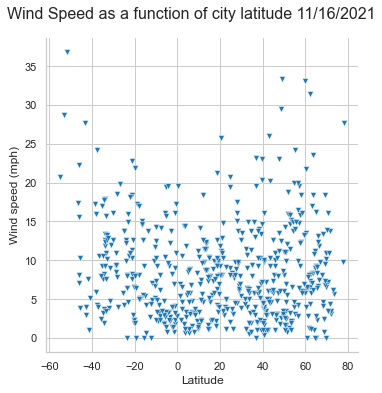

<Figure size 432x288 with 0 Axes>

In [18]:
#SEABORN SCATTERPLOT FOR LATITUDE/WIND SPEED

WIND_SPEED = sns.relplot(x = 'Latitude', y='WindSpeed', data = complete_weather, kind = 'scatter', marker = 'v')
WIND_SPEED.fig.suptitle(f'Wind Speed as a function of city latitude {today}', fontsize = 16, y = 1.05)
WIND_SPEED.set(xlabel = 'Latitude', ylabel = 'Wind speed (mph)')
plt.show();
plt.savefig('WIND_SPEED.png')

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

The maximum daily temperature increases as the latitude decreases: it gets warmer as you approach the equator. However, the degree of warming is not symmetrical. The temperatures decline faster as you move towards the North Pole; similar latitudes in the Southern Hemisphere are warmer.

Humidity is greatest within 10 degrees of the equator (it stays above 60%); lower humidities occur between 20-40 degrees. This makes sense, as air rising from the equator releases precipitation; air masses move poleward, warm, sink, and draws moisture from the land, creating arid zones between 20-40 degrees.

There is no clear relationship between cloudiness, or wind speed, and latitude.

Note: I rescaled the latitude axis to range from -80 to 80. This allows us to see that the Northern Hemisphere is more heavily sampled. This sampling is due to the unequal distribution of land masses on the globe (more land mass occurs in the Northern Hemsiphere above 60 degrees). Generalizations about the relationships between latitude and weather characteristics have to be interpreted with this in mind.

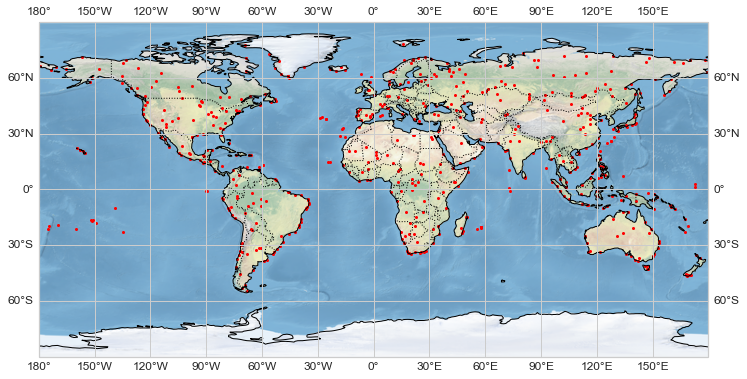

In [19]:
#I THOUGHT THIS WOULD BE A FUN ADDITION.

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#INITIALIZE THE MAP
fig = plt.figure(figsize=(12,9))

#SET THE PROJECTION TO PLATECARREE AND ADD FEATURES

ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle = 'dotted')
ax.gridlines(draw_labels = True, xlocs = np.arange(-180,180,30))

#PLOT THE CITY COORDINATE DATA ON TOP OF MAP

plt.scatter(complete_weather['Longitude'], complete_weather['Latitude'], color = 'red', s = 4, alpha = 1)

#HOWEVER, IT LOOKS LIKE SOME OF THE CITIES ARE IN THE MIDDLE OF THE OCEAN :( 

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

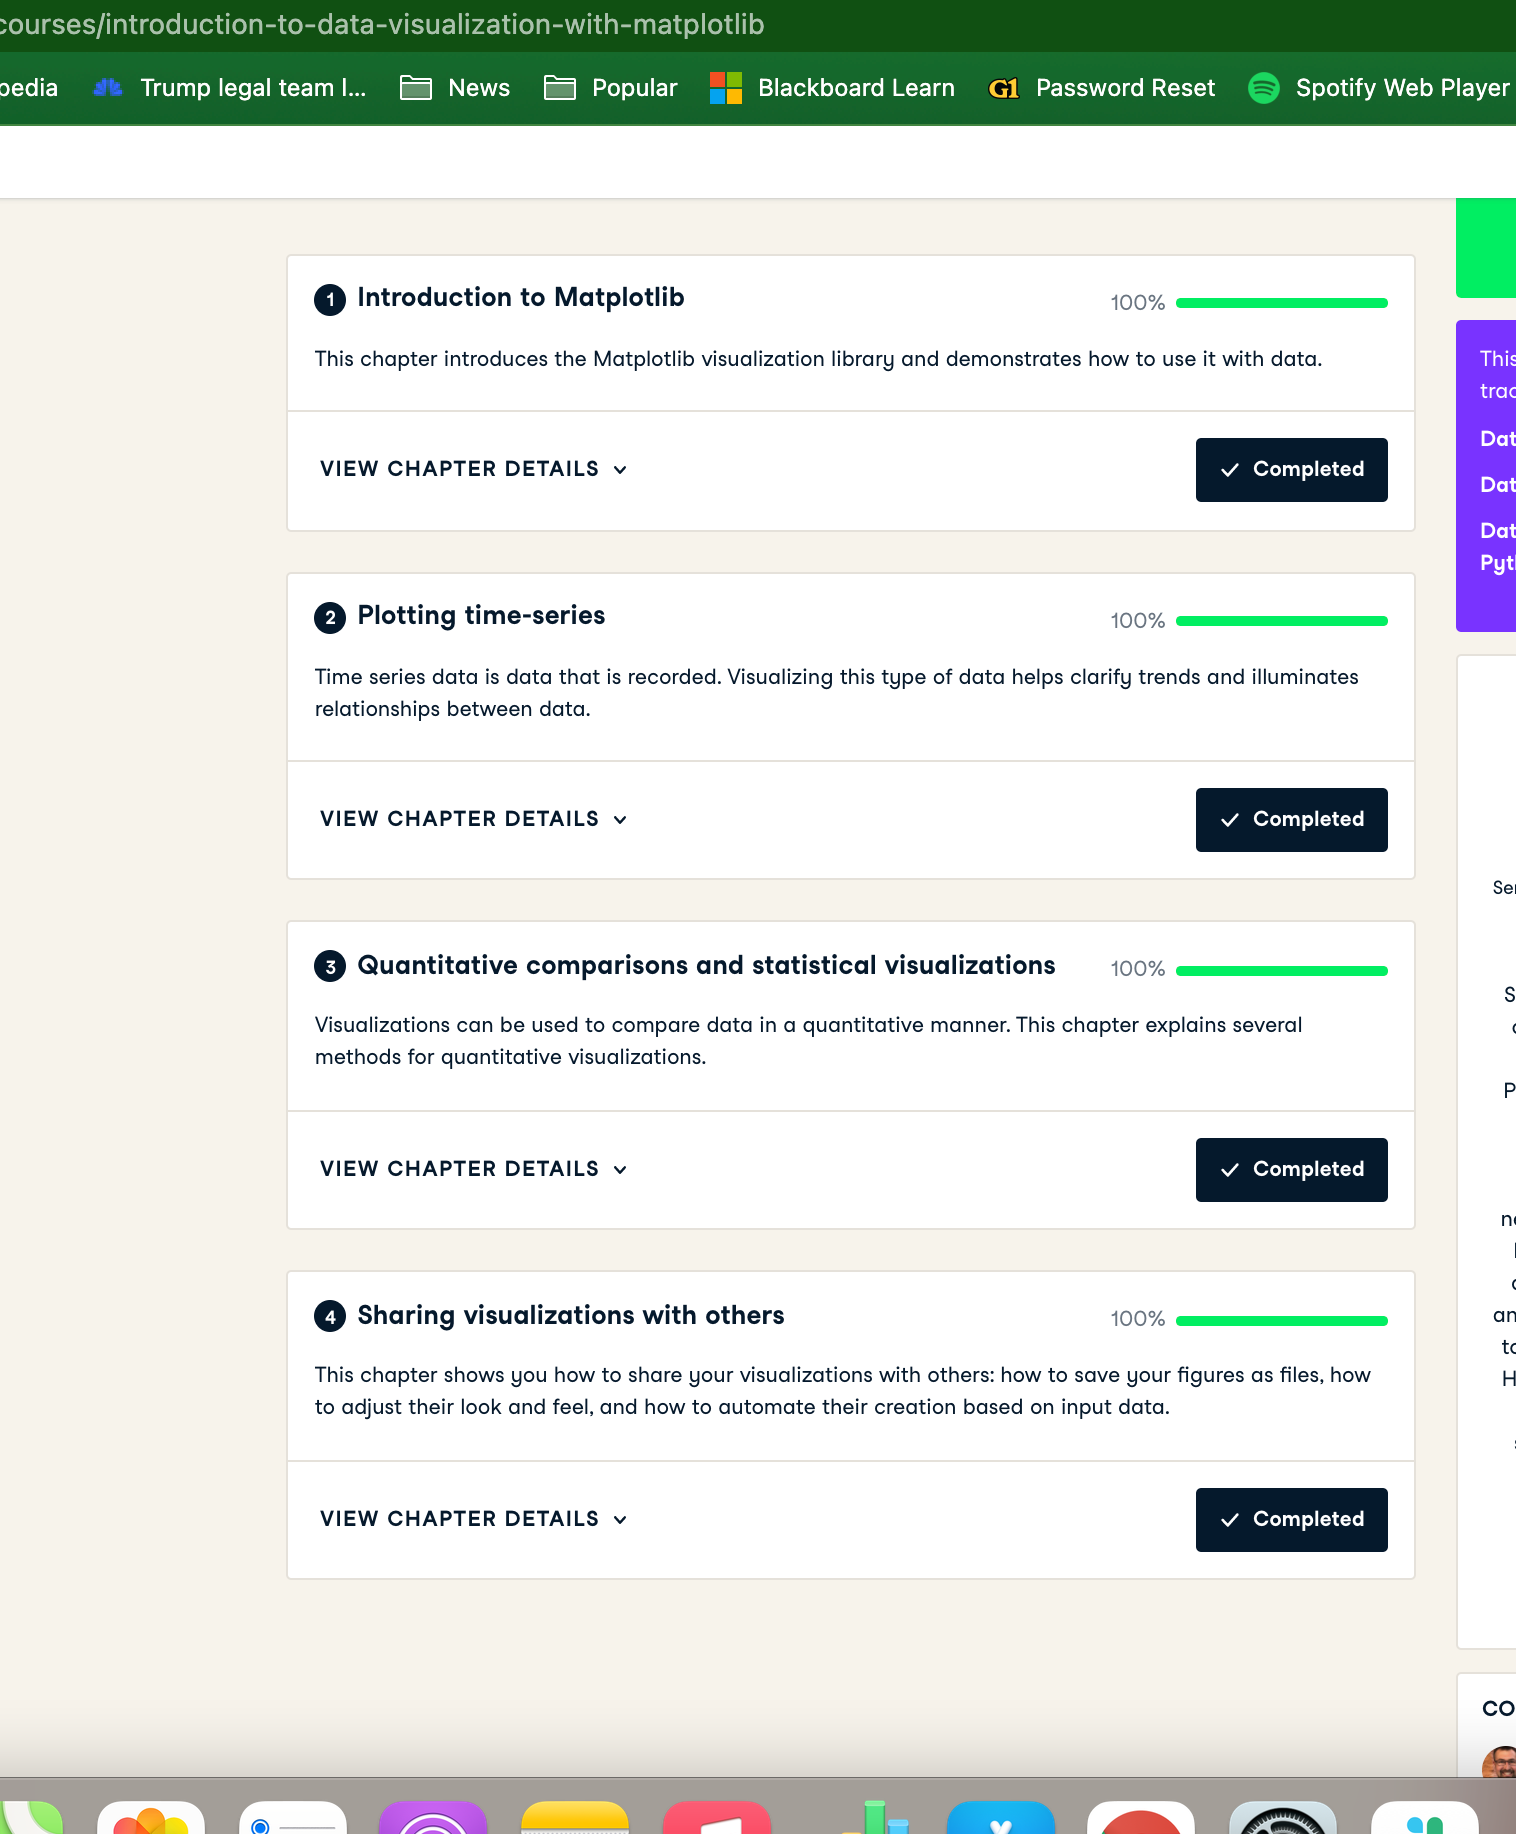

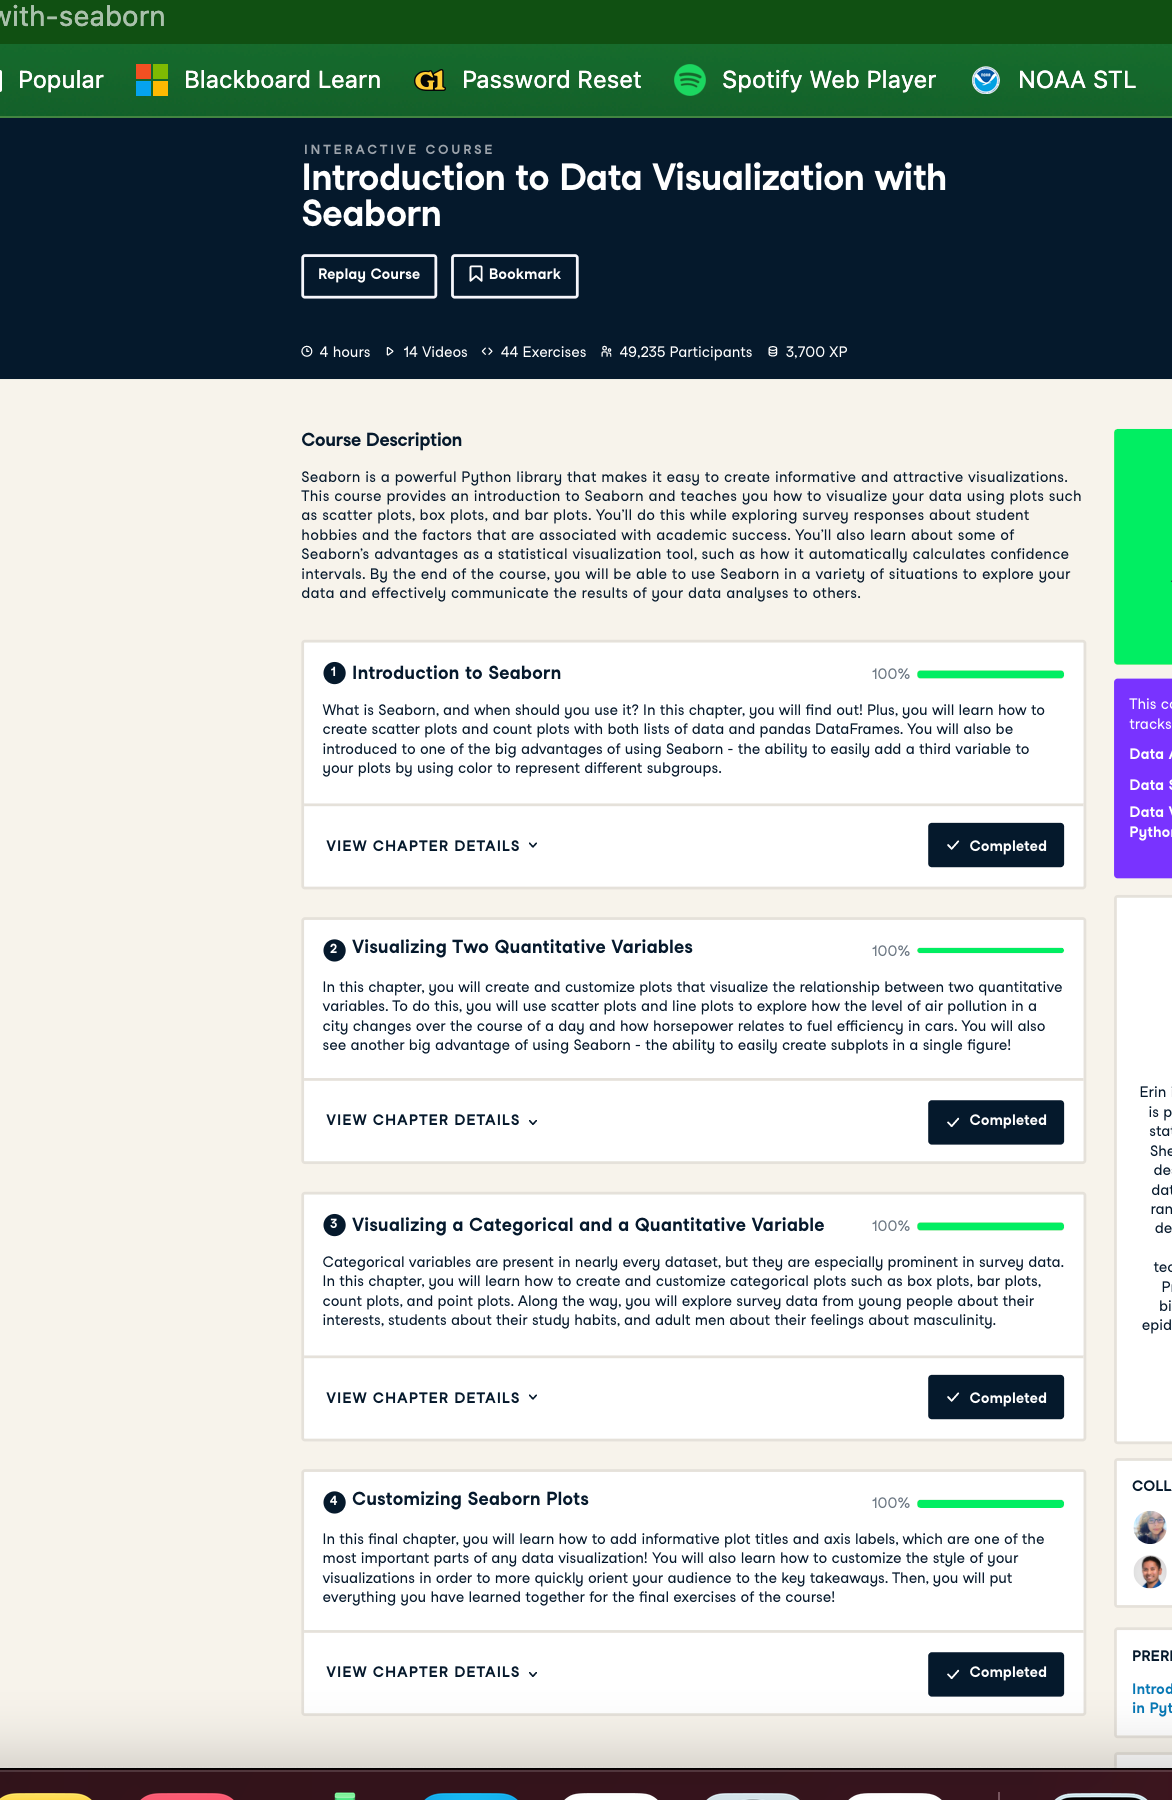